<span style= "font-size:20px; color:blue"><b>MUSIC (MUerte Subita e Insuficiencia Cardiaca = Sudden Death in Heart Failure)
Martin-Yebra, A., Martínez, J. P., & Laguna, P. (2025). MUSIC (Sudden Cardiac Death in Chronic Heart Failure) (version 1.0.1). PhysioNet. RRID:SCR_007345. https://doi.org/10.13026/z3m7-rf58</b></span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
import json
np.set_printoptions(precision = 4, suppress = True)
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 80
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

C:\Users\jaspr\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


**For fetching or opening the downloaded dataset**

In [2]:
import pathlib
from pathlib import Path, WindowsPath
import urllib.request

# p = WindowsPath(r"C:\Users\jaspr\Desktop\Jaspreet\Miscellaneous\Books\Coding_Books\Studies\MUSIC_Sudden Cardiac Death in ambulatory patients with Chronic Heart Failure\subject-info.csv")
# p.as_posix
# p.parent

# def load_data():
#     file_path = Path('C:/Users/jaspr/Desktop/Jaspreet/Miscellaneous/Books/Coding_Books/Studies/MUSIC_Sudden Cardiac Death in ambulatory patients with Chronic Heart Failure/subject-info.csv')
#     data_dir = file_path.parent
#     if not file_path.is_file():
#         data_dir.mkdir(parents=True, exist_ok=True)
#         url = "https://www.physionet.org/content/music-sudden-cardiac-death/1.0.1/subject-info.csv"
#         urllib.request.urlretrieve(url, file_path)
#     return pd.read_csv(file_path, sep=';', on_bad_lines='skip', skiprows=lambda x: (1 <= x <= 279) or (x >= 1280))

# load_data()

# To remove html markups in the columns
# <table>
#   <tr> <!-- Start of the row -->
#     <td>P0001</td> <!-- A single cell containing the data "P0001" -->
#   </tr> <!-- End of the row -->
# </table>


# df = df.replace(r'<[^>]+>', '', regex=True)

# <: Matches the opening bracket
# [^>]+: Matches one or more characters that are not a closing bracket
# >: Matches the closing bracket
# regex=True: Tells pandas to treat the pattern as a regular expression rather than a literal string

In [3]:
# # For opening ECG file.hea and file.dat files

# import wfdb
# import pandas as pd

# Both 'file.hea' and 'file.dat' must be in the same directory
# record = wfdb.rdrecord('C:/Users/jaspr/Desktop/Jaspreet/Miscellaneous/Books/Coding_Books/Studies/MUSIC_Sudden Cardiac Death in ambulatory patients with Chronic Heart Failure/P0001_H')
# df = record.to_dataframe()
# print(record.fs)  # Sampling frequency
# print(record.sig_name)  # Signal names (e.g., 'ECG')

In [4]:
music_study = pd.read_csv('C:/Users/jaspr/Desktop/Jaspreet/Miscellaneous/Books/Coding_Books/Studies/MUSIC_Sudden Cardiac Death in ambulatory patients with Chronic Heart Failure/subject-info.csv', index_col= "Patient ID", sep = ";")
music_study.head()

,Follow-up period from enrollment (days),days_4years,Exit of the study,Cause of death,SCD_4years SinusRhythm,HF_4years SinusRhythm,Age,Gender (male=1),Weight (kg),Height (cm),...,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181
Patient ID,,,,,,,,,,,,,,,,,,,,,
P0001,2065,1460,NaN,0,0,0,58,1,83,163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0002,2045,1460,NaN,0,0,0,58,1,74,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0003,2044,1460,NaN,0,0,0,69,1,83,174,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0004,2044,1460,NaN,0,0,0,56,0,84,165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P0005,2043,1460,NaN,0,0,0,70,1,97,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
music_study['Holter available'].value_counts()

Holter available
1    936
0     56
Name: count, dtype: int64

In [6]:
data = music_study.iloc[:, 0:104]
data.columns.tolist()

['Follow-up period from enrollment (days)',
 'days_4years',
 'Exit of the study',
 'Cause of death',
 'SCD_4years SinusRhythm',
 'HF_4years SinusRhythm',
 'Age',
 'Gender (male=1)',
 'Weight (kg)',
 'Height (cm)',
 'Body Mass Index (Kg/m2)',
 'NYHA class',
 'Diastolic blood  pressure (mmHg)',
 'Systolic blood pressure (mmHg)',
 'HF etiology - Diagnosis',
 'Diabetes (yes=1)',
 'History of dyslipemia (yes=1)',
 'Peripheral vascular disease (yes=1)',
 'History of hypertension (yes=1)',
 'Prior Myocardial Infarction (yes=1)',
 'Prior implantable device',
 'Prior Revascularization',
 'Syncope',
 'daily smoking (cigarretes/day)',
 'smoke-free time (years)',
 'cigarettes /year',
 'alcohol consumption (standard units)',
 'Albumin (g/L)',
 'ALT or GPT (IU/L)',
 'AST or GOT (IU/L)',
 'Normalized Troponin',
 'Total Cholesterol (mmol/L)',
 'Creatinine (?mol/L)',
 'Gamma-glutamil transpeptidase (IU/L)',
 'Glucose (mmol/L)',
 'Hemoglobin (g/L)',
 'HDL (mmol/L)',
 'Potassium (mEq/L)',
 'LDL (mmol/L)'

In [7]:
data['SCD_4years SinusRhythm'].size

992

In [8]:
data.isna().sum()

Follow-up period from enrollment (days)      0
days_4years                                  0
Exit of the study                          695
Cause of death                               0
SCD_4years SinusRhythm                       0
                                          ... 
Spironolactone (yes=1)                       0
Statins (yes=1)                              0
Hidralazina (yes=1)                          0
ACE inhibitor (yes=1)                        0
Nitrovasodilator (yes=1)                     0
Length: 104, dtype: int64

**Prepare data for analysis**

In [9]:
# Selecting columns 

# data1 = data.loc[:, ['SCD_4years SinusRhythm', 'Age', 'Gender', 'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)', 'NYHA class', 
#                      'Diastolic blood  pressure (mmHg)', 'Systolic blood pressure (mmHg)', 'HF etiology - Diagnosis',
#                      'Diabetes (yes=1)']]

# # Modifying the columns or index attribute in place

# data1.columns = ['SCD', 'Age', 'Gender', 'Weight(kg)', 'Height(cm)', 'BMI(Kg/m2)', 'NYHA class', 
#                      'DBP(mmHg)', 'SBP(mmHg)', 'HF', 'Diabetes']

# # Replacing comma with decimal point and change the dataframe column/Series to numeric object

# data1['BMI(Kg/m2)'] = pd.to_numeric(data1['BMI(Kg/m2)'].str.replace(',', '.'))

# # Replacing string and change the dataframe column/Series to categorical type

# data1['Age'] = (data1['Age'].str.replace('>89', '90')).astype('category')

In [10]:
# Rename columns (creates transformed dataframe wihout changing the original dataframe)
# data = data.rename(columns = {'Gender (male=1)': 'Gender', 'LVEF (%)': 'LVEF'})
# data.loc[data.Gender == 1, 'Gender'] = "Male"
# data.loc[data['Gender'] == 0, 'Gender'] = "Female"
# data.head()

In [11]:
# data2 = data1.pivot_table(index=['Age', "Gender"], columns= ['NYHA class'], 
#                          values= ['BMI(Kg/m2)', 'DBP(mmHg)', 'SBP(mmHg)'],
#                          aggfunc=['max', 'min'], fill_value= 0, margins=False).dropna()


In [12]:
# # Using IndexSlice object to select the lower levels

# idx = pd.IndexSlice
# data2.loc[idx[:, 'Female'], idx[:, 'BMI(Kg/m2)']]

In [13]:
# Fill missing values in the columns

# lvef_median = data['LVEF'].median()
# data['LVEF'] = data['LVEF'].fillna(lvef_median).astype('Int64')
# data.LVEF.dtype

In [14]:
# Use Series map function to transform column. Use both dict and function

# study_status = {0:'missing', 1:'Stage1', 2:'Stage2', 3:'Stage3', }

# def status(x):
#     return study_status[x]
# data['Study_completion_stage'] = (data['Exit of the study'].fillna(0)).map(status)
# data['Study_completion_stage'].value_counts()

# data['Study_completion_stage'] = data['Exit of the study'].map(study_status)
# data['Study_completion_stage'].value_counts(dropna=False).fillna(0)

In [15]:
data_model = music_study.loc[:, ['SCD_4years SinusRhythm', 'Age', 'Gender (male=1)', 'Weight (kg)', 'Height (cm)', 'Body Mass Index (Kg/m2)',
 'NYHA class', 'Diastolic blood  pressure (mmHg)', 'Systolic blood pressure (mmHg)', 'HF etiology - Diagnosis', 'Diabetes (yes=1)',
 'History of dyslipemia (yes=1)', 'Peripheral vascular disease (yes=1)', 'History of hypertension (yes=1)', 'Prior Myocardial Infarction (yes=1)',
 'Prior implantable device', 'Prior Revascularization', 'Syncope', 'daily smoking (cigarretes/day)', 'smoke-free time (years)',
 'alcohol consumption (standard units)', 'Albumin (g/L)', 'ALT or GPT (IU/L)', 'AST or GOT (IU/L)',
 'Normalized Troponin', 'Total Cholesterol (mmol/L)', 'Creatinine (?mol/L)', 'Gamma-glutamil transpeptidase (IU/L)',
 'Glucose (mmol/L)', 'Hemoglobin (g/L)', 'HDL (mmol/L)', 'Potassium (mEq/L)', 'LDL (mmol/L)', 'Sodium (mEq/L)',
 'Pro-BNP (ng/L)', 'Protein (g/L)', 'T3 (pg/dL)', 'T4 (ng/L)', 'Troponin (ng/mL)', 'TSH (mIU/L)', 'Urea (mg/dL)',
 'Signs of pulmonary venous hypertension (yes=1)', 'Cardiothoracic ratio', 'Left atrial size (mm)', 'Right ventricle contractility (altered=1)', 'Right ventricle end-diastolic diameter (mm)',
 'LVEF (%)', 'Mitral valve insufficiency ', 'Mitral flow pattern', 'Left ventricular posterior wall thickness (mm)',
 'Septal thickness (mm)', 'Left ventricle end-diastolic diameter (mm)', 'Left ventricle end-systolic diameter (mm)',
 'Hig-resolution ECG available', 'Q-waves (necrosis, yes=1)', 'PR interval (ms)', 'QRS duration (ms)',
 'QT corrected ', 'Average RR (ms) ', 'Left ventricular hypertrophy (yes=1)',
 'Intraventricular conduction disorder', 'Holter available', 
 'Average RR (ms)', 'Number of ventricular premature beats in 24h',
 'Extrasystole couplets ', 'Ventricular Extrasystole', 'Ventricular Tachycardia', 'Number of ventricular premature contractions per hour',
 'Non-sustained ventricular tachycardia (CH>10)', 'Number of supraventricular premature beats in 24h', 'Paroxysmal supraventricular tachyarrhythmia',
 'Longest RR pause (ms)', 'Bradycardia', 'SDNN (ms)', 'SDANN (ms)', 'RMSSD (ms)', 'pNN50 (%)', 'Calcium channel blocker (yes=1)',
 'Diabetes medication (yes=1)', 'Amiodarone (yes=1)', 'Angiotensin-II receptor blocker (yes=1)', 'Anticoagulants/antitrombotics  (yes=1)',
 'Betablockers (yes=1)', 'Digoxin (yes=1)', 'Loop diuretics (yes=1)', 'Spironolactone (yes=1)', 'Statins (yes=1)',
 'Hidralazina (yes=1)', 'ACE inhibitor (yes=1)', 'Nitrovasodilator (yes=1)']]

In [16]:
data_model.columns = ['SCD', 'Age', 'Gender', 'Weight(kg)', 'Height(cm)', 'BMI(Kg/m2)',
 'NYHA_class', 'DBP(mmHg)', 'SBP(mmHg)', 'HF_Diagnosis', 'Diabetes', 'Dyslipemia', 'Peripheral_vascular_disease',
'Hypertension', 'Prior_Myocardial_Infarction', 'Prior_implantable_device', 'Prior_Revascularization', 'Syncope',
'Smoking(cigarettes/day)', 'smoke_free_time(years)', 'alcohol_consumption', 'Albumin(g/L)', 'ALT(IU/L)', 'AST(IU/L)',
'Troponin', 'Total_Cholesterol(mmol/L)', 'Creatinine(mol/L)', 'GGT(IU/L)', 'Glucose(mmol/L)', 'Hemoglobin(g/L)',
'HDL(mmol/L)', 'Potassium(mEq/L)', 'LDL(mmol/L)', 'Sodium(mEq/L)', 'Pro_BNP(ng/L)', 'Protein(g/L)', 'T3(pg/dL)',
'T4(ng/L)', 'Troponin(ng/mL)', 'TSH(mIU/L)', 'Urea(mg/dL)', 'pulmonary_venous_hypertension', 'Cardiothoracic_ratio',
'Left_atrial_size (mm)', 'Right_ventricle_contractility', 'RV_end_diastolic diameter(mm)', 'LVEF (%)',
'Mitral_valve_insufficiency', 'Mitral_flow_pattern', 'LV_posterior_wall_thickness(mm)',
 'Septal_thickness(mm)', 'LV_end_diastolic_diameter(mm)', 'LV_end_systolic_diameter(mm)',
 'ECG', 'Q_waves', 'PR(ms)', 'QRS(ms)', 'QT_corrected ', 'ECG_Average_RR(ms)', 'LV_hypertrophy',
 'Intraventricular_conduction_disorder', 'Holter', 'Holter_Avg_RR(ms)', 'VPB_24h',
 'Extrasystole_couplets ', 'Ventricular_Extrasystole', 'Ventricular_Tachycardia', 'VPC_per_hour',
 'Non_sustained_ventricular_tachycardia', 'SVPB_24h', 'PSVT', 'RR_pause(ms)', 'Bradycardia', 'SDNN(ms)', 'SDANN(ms)',
'RMSSD(ms)', 'pNN50(%)', 'Calcium_channel_blocker', 'Diabetes_medication', 'Amiodarone', 'ARB', 'Anticoagulants',
 'Betablockers', 'Digoxin', 'Loop_diuretics', 'Spironolactone', 'Statins', 'Hydralazine', 'ACE', 'Nitrovasodilator']
data_model.head(2)

,SCD,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),NYHA_class,DBP(mmHg),SBP(mmHg),HF_Diagnosis,...,ARB,Anticoagulants,Betablockers,Digoxin,Loop_diuretics,Spironolactone,Statins,Hydralazine,ACE,Nitrovasodilator
Patient ID,,,,,,,,,,,,,,,,,,,,,
P0001,0,58,1,83,163,"31,2",3,75,110,1,...,0,1,1,1,1,0,0,0,1,0
P0002,0,58,1,74,160,"28,9",2,80,130,2,...,1,1,1,0,0,0,1,0,0,0


In [17]:
# To select rows from a dataframe column or index using Boolean masking
# data_model.Age[data['Weight (kg)'] > 110].value_counts().sort_index()

In [18]:
# Using masking to assign new value to Series with dtype Int64
# data_model.Age[data['Age'] == '>89'] = 90

# Using str.replace method to assign new value to Series with dtype Object
data_model['Age'] = data_model['Age'].str.replace('>89', '90').astype('Int64')
# data_model.Age[data_model['Age'] == '90'] 


# To replace comma in numberic values with decimal point in a single column & fpr applying a function 
# elementwise to a entire dataframe

# data_model['BMI(Kg/m2)'] = data_model['BMI(Kg/m2)'].str.replace(',', '.').astype('float64')
data_model = data_model.map(lambda x : str(x).replace(',', '.')).astype('float64')


In [19]:
data_model.query('Age > 50 and NYHA_class == 2').head()

,SCD,Age,Gender,Weight(kg),Height(cm),BMI(Kg/m2),NYHA_class,DBP(mmHg),SBP(mmHg),HF_Diagnosis,...,ARB,Anticoagulants,Betablockers,Digoxin,Loop_diuretics,Spironolactone,Statins,Hydralazine,ACE,Nitrovasodilator
Patient ID,,,,,,,,,,,,,,,,,,,,,
P0002,0.0,58.0,1.0,74.0,160.0,28.9,2.0,80.0,130.0,2.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
P0003,0.0,69.0,1.0,83.0,174.0,27.4,2.0,75.0,100.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
P0004,0.0,56.0,0.0,84.0,165.0,30.9,2.0,75.0,155.0,8.0,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
P0005,0.0,70.0,1.0,97.0,183.0,29.0,2.0,85.0,125.0,2.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
P0006,0.0,70.0,1.0,83.0,165.0,30.5,2.0,75.0,105.0,2.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [20]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, P0001 to P1083
Data columns (total 90 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SCD                                    992 non-null    float64
 1   Age                                    992 non-null    float64
 2   Gender                                 992 non-null    float64
 3   Weight(kg)                             992 non-null    float64
 4   Height(cm)                             992 non-null    float64
 5   BMI(Kg/m2)                             992 non-null    float64
 6   NYHA_class                             992 non-null    float64
 7   DBP(mmHg)                              992 non-null    float64
 8   SBP(mmHg)                              992 non-null    float64
 9   HF_Diagnosis                           992 non-null    float64
 10  Diabetes                               992 non-null    float64
 11  Dysli

In [21]:
data_model['Cardiothoracic_ratio'].value_counts()

Cardiothoracic_ratio
0.50    191
0.60    163
0.55     67
0.40     47
0.53     45
       ... 
0.79      2
0.72      2
0.76      1
0.42      1
0.77      1
Name: count, Length: 37, dtype: int64

In [22]:
data_model.iloc[:, [2, 80]].head()

,Gender,ARB
Patient ID,,
P0001,1.0,0.0
P0002,1.0,1.0
P0003,1.0,1.0
P0004,0.0,1.0
P0005,1.0,0.0


In [23]:
pd.isna(data_model).sum()

SCD                 0
Age                 0
Gender              0
Weight(kg)          0
Height(cm)          0
                   ..
Spironolactone      0
Statins             0
Hydralazine         0
ACE                 0
Nitrovasodilator    0
Length: 90, dtype: int64

**To explore the dataset for correlations, use hist(), corr(), scatter_matrix, heatmap**

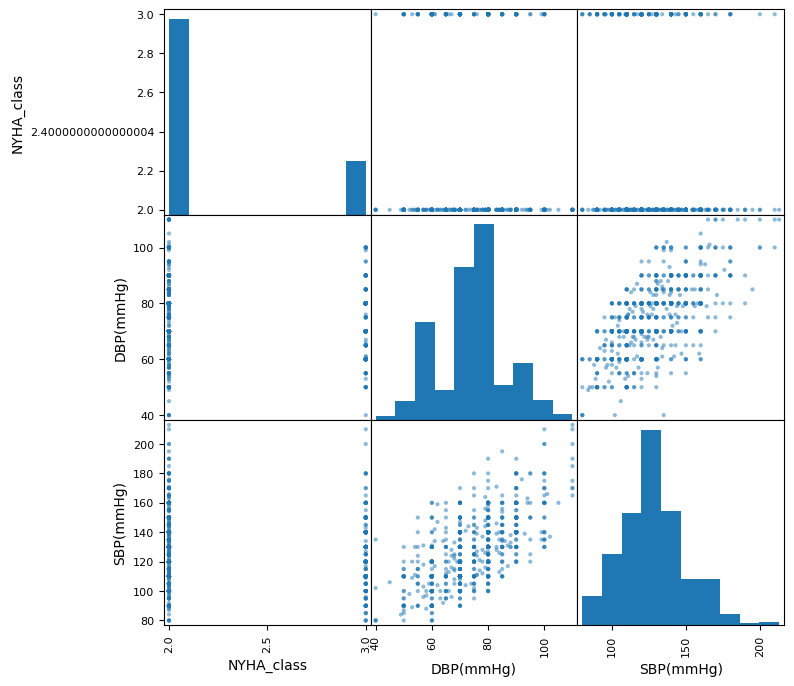

In [24]:
from pandas.plotting import scatter_matrix

attributes = ['NYHA_class', 'DBP(mmHg)', 'SBP(mmHg)']

scatter_matrix(data_model[attributes], figsize=(8,8))
plt.show()

**Apply custom transformation to prepare data for applying models**

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

# data_num = data_model.select_dtypes(include=[np.number])
# data_cat = data_model.select_dtypes(include=object)

In [26]:
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'),
                            StandardScaler())

cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(handle_unknown='ignore'))

# log_pipeline = make_pipeline(SimpleImputer(startegy='median'),
#                             FunctionTransformer(np.log, inverse_func= np.exp, feature_names_out="one-to-one"),
#                             StandardScaler())

# FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[80.0]], gamma=0.1))

In [27]:
# from sklearn.cluster import Kmeans

# class ClusterSimilarity(BaseEstimator, TransformerMixin):
#     def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
#         self.n_clusters = n_clusters
#         self.gamma = gamma
#         self.random_state = random_state
#     def fit(self, X, y=None, sample_weights=None):
#         self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
#         self.kmeans_.fit(X, sample_weight = sample_weight)
#         return self
#     def transform(self, X):
#         return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
#     def get_feature_names_out(self, names=None):
#         return [ f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [28]:
num_attribs = ['Age', 'Weight(kg)', 'Height(cm)', 'BMI(Kg/m2)',
 'DBP(mmHg)', 'SBP(mmHg)', 'Diabetes', 'Dyslipemia', 'Peripheral_vascular_disease',
'Hypertension', 'Prior_Myocardial_Infarction', 'Prior_implantable_device', 'Prior_Revascularization', 'Syncope',
'Smoking(cigarettes/day)', 'smoke_free_time(years)', 'alcohol_consumption', 'Albumin(g/L)', 'ALT(IU/L)', 'AST(IU/L)',
'Troponin', 'Total_Cholesterol(mmol/L)', 'Creatinine(mol/L)', 'GGT(IU/L)', 'Glucose(mmol/L)', 'Hemoglobin(g/L)',
'HDL(mmol/L)', 'Potassium(mEq/L)', 'LDL(mmol/L)', 'Sodium(mEq/L)', 'Pro_BNP(ng/L)', 'Protein(g/L)', 'T3(pg/dL)',
'T4(ng/L)', 'Troponin(ng/mL)', 'TSH(mIU/L)', 'Urea(mg/dL)', 'pulmonary_venous_hypertension', 'Cardiothoracic_ratio',
'Left_atrial_size (mm)', 'Right_ventricle_contractility', 'RV_end_diastolic diameter(mm)', 'LVEF (%)',
'Mitral_valve_insufficiency', 'Mitral_flow_pattern', 'LV_posterior_wall_thickness(mm)',
 'Septal_thickness(mm)', 'LV_end_diastolic_diameter(mm)', 'LV_end_systolic_diameter(mm)',
 'ECG', 'Q_waves', 'PR(ms)', 'QRS(ms)', 'QT_corrected ', 'ECG_Average_RR(ms)', 'LV_hypertrophy',
 'Intraventricular_conduction_disorder', 'Holter', 'Holter_Avg_RR(ms)', 'VPB_24h',
 'Extrasystole_couplets ', 'Ventricular_Extrasystole', 'Ventricular_Tachycardia', 'VPC_per_hour',
 'Non_sustained_ventricular_tachycardia', 'SVPB_24h', 'PSVT', 'RR_pause(ms)', 'Bradycardia', 'SDNN(ms)', 'SDANN(ms)',
'RMSSD(ms)', 'pNN50(%)']

cat_attribs = ['NYHA_class', 'HF_Diagnosis']

# To check if these attributes have missing values and require simpleimputer
# data_model[['Calcium_channel_blocker', 'Diabetes_medication', 'Amiodarone', 'ARB', 'Anticoagulants',
#  'Betablockers', 'Digoxin', 'Loop_diuretics', 'Spironolactone', 'Statins',
# 'Hydralazine', 'ACE', 'Nitrovasodilator']].isna().sum()

#  cat_attributes = []

In [29]:
# preprocessing = make_column_transformer(num_pipeline, make_column_selector(dtype_include=np.number),
#                                         cat_pipeline, make_column_selector(dtype_include=object),
#                                        remainder = "passthrough")

In [30]:
preprocessing = make_column_transformer((num_pipeline, num_attribs),
                                        (cat_pipeline, cat_attribs),
                                       remainder="passthrough")

data_prepared = preprocessing.fit_transform(data_model)
# data_prepared.shape
# preprocessing.get_feature_names_out()

In [45]:
data_model_prepared = pd.DataFrame(data_prepared, columns= preprocessing.get_feature_names_out(),
                                 index= data_model.index)
# data_model_prepared = pd.DataFrame(data_prepared, columns= data_model.columns,
#                                  index= data_model.index)

data_model_prepared.head()


,pipeline-1__Age,pipeline-1__Weight(kg),pipeline-1__Height(cm),pipeline-1__BMI(Kg/m2),pipeline-1__DBP(mmHg),pipeline-1__SBP(mmHg),pipeline-1__Diabetes,pipeline-1__Dyslipemia,pipeline-1__Peripheral_vascular_disease,pipeline-1__Hypertension,...,remainder__ARB,remainder__Anticoagulants,remainder__Betablockers,remainder__Digoxin,remainder__Loop_diuretics,remainder__Spironolactone,remainder__Statins,remainder__Hydralazine,remainder__ACE,remainder__Nitrovasodilator
Patient ID,,,,,,,,,,,,,,,,,,,,,
P0001,-0.570838,0.411397,-0.182810,0.611958,0.063862,-0.781910,-0.748163,-0.995976,-0.451535,-1.150298,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
P0002,-0.570838,-0.231852,-0.519054,0.095214,0.480646,0.139459,-0.748163,1.004040,-0.451535,-1.150298,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
P0003,0.375384,0.411397,1.050084,-0.241794,0.063862,-1.242595,-0.748163,-0.995976,-0.451535,-1.150298,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
P0004,-0.742878,0.482869,0.041353,0.544557,0.063862,1.291171,1.336606,1.004040,-0.451535,0.869340,...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
P0005,0.461405,1.412007,2.058816,0.117681,0.897430,-0.090883,1.336606,1.004040,-0.451535,0.869340,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0


In [32]:
preprocessing.get_feature_names_out()

array(['pipeline-1__Age', 'pipeline-1__Weight(kg)',
       'pipeline-1__Height(cm)', 'pipeline-1__BMI(Kg/m2)',
       'pipeline-1__DBP(mmHg)', 'pipeline-1__SBP(mmHg)',
       'pipeline-1__Diabetes', 'pipeline-1__Dyslipemia',
       'pipeline-1__Peripheral_vascular_disease',
       'pipeline-1__Hypertension',
       'pipeline-1__Prior_Myocardial_Infarction',
       'pipeline-1__Prior_implantable_device',
       'pipeline-1__Prior_Revascularization', 'pipeline-1__Syncope',
       'pipeline-1__Smoking(cigarettes/day)',
       'pipeline-1__smoke_free_time(years)',
       'pipeline-1__alcohol_consumption', 'pipeline-1__Albumin(g/L)',
       'pipeline-1__ALT(IU/L)', 'pipeline-1__AST(IU/L)',
       'pipeline-1__Troponin', 'pipeline-1__Total_Cholesterol(mmol/L)',
       'pipeline-1__Creatinine(mol/L)', 'pipeline-1__GGT(IU/L)',
       'pipeline-1__Glucose(mmol/L)', 'pipeline-1__Hemoglobin(g/L)',
       'pipeline-1__HDL(mmol/L)', 'pipeline-1__Potassium(mEq/L)',
       'pipeline-1__LDL(mmol/L)', 

In [33]:
# To calculate the stratified sampling
np.bincount(data_model['Gender'])

# For stratification, if want to create a new categorical column of a numerical attribute with sufficent instances
# use pd.cut. Drop the column after stratification

array([274, 718], dtype=int64)

**Select the features and target columns**

In [34]:
predictors_clf = data_model_prepared.drop(columns= ['remainder__SCD'])
target_clf = data_model_prepared['remainder__SCD']


In [35]:
# Convert dataframe to numpy array
X = predictors_clf.to_numpy()
y = target_clf.to_numpy()
y[:10]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

**Split the training & test dataset**

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify= data_model_prepared['remainder__SCD'])


**Classification_models**

**Logistic Regression**

In [38]:
# from sklearn.linear_model import LogisticRegressionCV
# model_cv = LogisticRegressionCV(C=10)
# model_cv.fit(X_train, y_train)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model = LogisticRegression(C=10)
scores = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")
scores

array([0.9032, 0.8831, 0.8992])

**Naive Bayes**

In [40]:
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()
# model.fit(X_train, y_train)
# y_model = model.predict(X_test)

In [41]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# f1_score(y_test, y_model)

In [42]:
# from sklearn.metrics import confusion_matrix
# mat = confusion_matrix(y_test, y_model)
# sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
# plt.xlabel('Predicted value')
# plt.ylabel('Actual value');

In [43]:
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import ConfusionMatrixDisplay

# y_train_pred = cross_val_predict(model, X_train, y_train, cv=3)
# ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, display_labels= ["No SCD", "SCD"])

**Support Vector Machine**

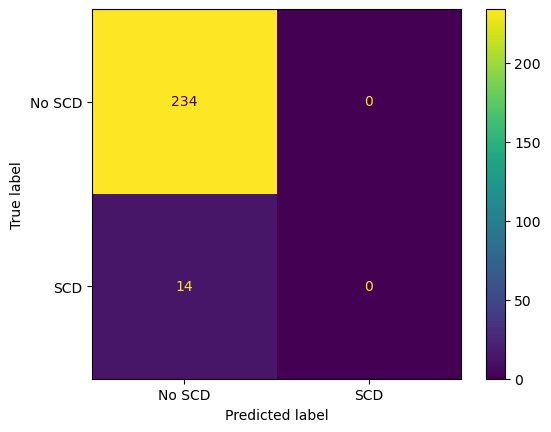

In [44]:
from sklearn.svm import SVC
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

ConfusionMatrixDisplay.from_estimator(clf_svm, X_test, y_test, display_labels= ["No SCD", "SCD"])

**Tuning hyperparameters using GridSearchCV**

In [45]:
# num_features = np.size(X_train, axis=1)
# num_features

In [46]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'C': [1, 10, 100, 1000],
#              'gamma': [1/num_features, 1, 0.1, .01, .001, .0001],
#              'kernel': ['linear', 'rbf']}

# grid = GridSearchCV(
#     SVC(), 
#     param_grid, 
#     cv=5,
#     scoring='roc_auc',
#     verbose=0
# )


# grid.fit(X_train, y_train)
# print(grid.best_params_)

# model=grid.best_estimator_
# y_fit= model.predict(X_test)

In [47]:
# ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, display_labels= ["No SCD", "SCD"] )

**Support Vector Machine Classifier applied after dimension reduction using PCA**

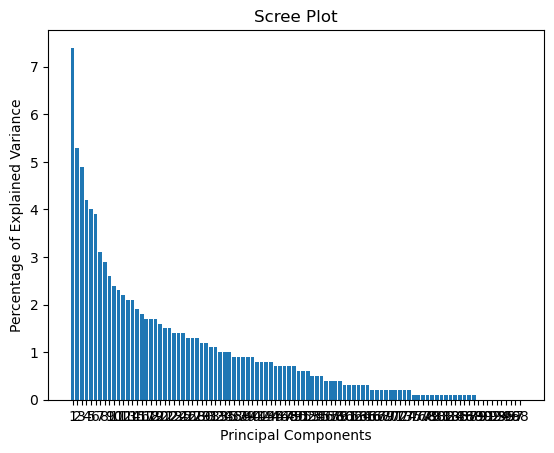

In [49]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

per_var= np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height= per_var, tick_label= labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [50]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

train_pca_scaled = np.column_stack((train_pc1_coords, train_pc2_coords))

num_features = np.size(train_pca_scaled, axis=1)
num_features

2

In [51]:
param_grid = {'C': [1, 10, 100, 1000],
             'gamma': [1/num_features, 1, 0.1, .01, .001, .0001, 0.00001],
             'kernel': ['rbf']}

grid = GridSearchCV(
    SVC(), 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    verbose=0
)


grid.fit(train_pca_scaled, y_train)
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [52]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.00001)
clf_svm.fit(train_pca_scaled, y_train)

SVC(C=1000, gamma=1e-05, random_state=42)

In [53]:
X_test_pca = pca.transform(X_test)
X_test_pc1_coords = X_test_pca[:, 0]
X_test_pc2_coords = X_test_pca[:, 1]

x_min = X_test_pc1_coords.min() - 1
x_max = X_test_pc1_coords.max() + 1

y_min = X_test_pc2_coords.min() - 1
y_max = X_test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

In [54]:
Z.shape

(120, 133)

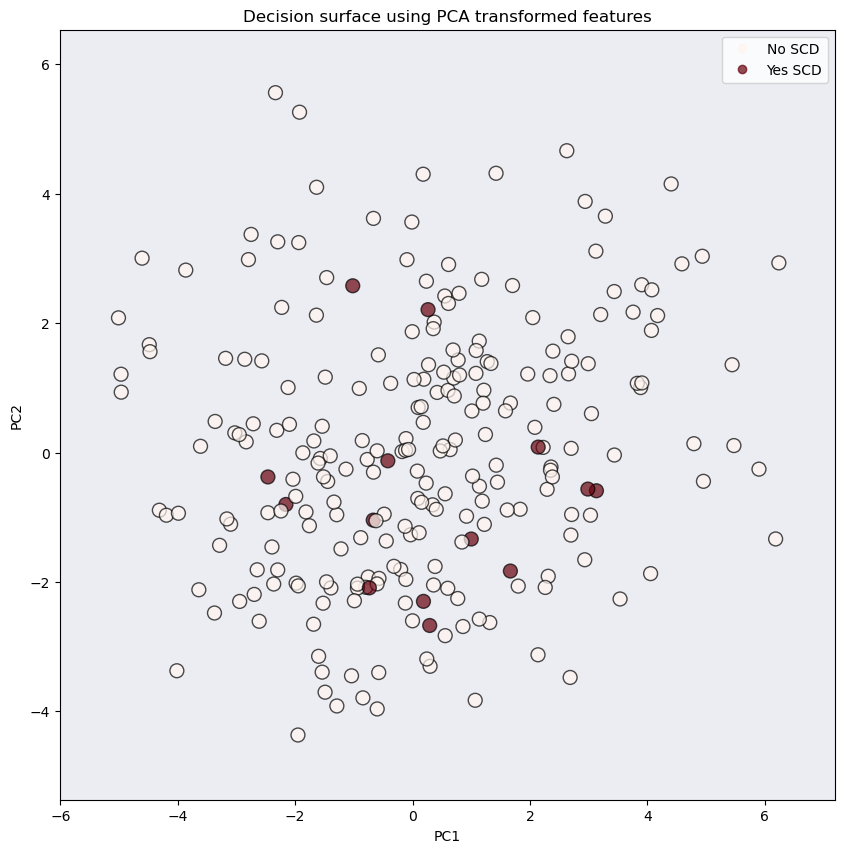

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.contourf(xx, yy, Z, alpha=0.1, )

scatter = ax.scatter(X_test_pc1_coords, X_test_pc2_coords, c= y_test, cmap= "Reds", s= 100, edgecolors= 'k', alpha=0.7)

legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc= 'upper right')

legend.get_texts()[0].set_text("No SCD")
legend.get_texts()[1].set_text("Yes SCD")

ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title("Decision surface using PCA transformed features")
plt.show()



**Neural network- Multilayer Perceptron**

In [48]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=[50, 50, 50], max_iter = 300, alpha=0.1, random_state=42)
mlp_clf.fit(X_train, y_train)

# y_pred = mlp_reg.predict(X_test)
y_pred = mlp_clf.predict_proba(X_test)
# mlp_clf.score(X_test, y_test)

# y_pred[:10]

**Ensemble methods**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                            n_estimators=30, 
                            learning_rate=0.5, 
                            random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

In [40]:
y_pred = ada_clf.predict_proba(X_test)
ada_clf.score(X_test, y_test)
# y_pred[:3]

array([[0.8038, 0.1962],
       [0.7083, 0.2917],
       [0.7   , 0.3   ]])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                                              ('rf', RandomForestClassifier(random_state=42)),
                                              ('svc', SVC(probability=True, random_state=42))], 
                                 final_estimator=RandomForestClassifier(random_state=43), 
                                 cv=5)

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [44]:
y_pred = stacking_clf.predict_proba(X_test)
stacking_clf.score(X_test, y_test)
# y_pred[:3]

0.9435483870967742

**Regression_models**

In [46]:
predictors_reg = data_model_prepared.drop(columns= ['pipeline-1__SBP(mmHg)'])
target_reg = data_model_prepared['pipeline-1__SBP(mmHg)']

In [47]:
# Convert dataframe to numpy array
X = predictors_reg.to_numpy()
y = target_reg.to_numpy()
y[:10]

array([-0.7819,  0.1395, -1.2426,  1.2912, -0.0909, -1.0123, -0.0909,
        0.6001,  1.5215,  0.6001])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify= data_model_prepared['remainder__Gender'])


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error

lin_reg = LinearRegression()
lin_rmses = -cross_val_score(lin_reg, X_train, y_train, cv=10, scoring="neg_root_mean_squared_error")

pd.Series(lin_rmses).describe()

count    10.000000
mean      0.722383
std       0.037581
min       0.656584
25%       0.697414
50%       0.733232
75%       0.740820
max       0.775922
dtype: float64

In [60]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

tree_rmses = root_mean_squared_error(y_test, y_pred)
tree_rmses

0.9457531266852849

In [61]:
# To apply inverse_transform function to transformer applied to one column

# col_transformer = full_pipeline.named_steps['preprocessing'] 
# transformer = col_transformer.named_transformers_['pipeline-1']

transformer = preprocessing.named_transformers_['pipeline-1']
transformer
# scaled_data = y_test.reshape(-1, 1)
# transformer.inverse_transform(y_test.reshape(-1, 1))


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_test)

feature_importances = forest_reg.feature_importances_
sorted(zip(feature_importances, preprocessing.get_feature_names_out()), reverse=True)

[(0.43891577318082076, 'pipeline-1__DBP(mmHg)'),
 (0.021338474886586186, 'pipeline-1__LV_end_diastolic_diameter(mm)'),
 (0.020783164620163705, 'pipeline-1__Age'),
 (0.019386269626214446, 'pipeline-1__RV_end_diastolic diameter(mm)'),
 (0.019037304228571778, 'pipeline-1__Height(cm)'),
 (0.01829746140316315, 'pipeline-1__Hemoglobin(g/L)'),
 (0.01657703317813108, 'pipeline-1__GGT(IU/L)'),
 (0.015511553993463044, 'pipeline-1__Holter'),
 (0.015127647704345286, 'pipeline-1__Mitral_flow_pattern'),
 (0.014699420599632024, 'pipeline-1__Troponin'),
 (0.013786363638226575, 'pipeline-1__Troponin(ng/mL)'),
 (0.013331026555282595, 'pipeline-1__Septal_thickness(mm)'),
 (0.012297947522738675, 'pipeline-1__Peripheral_vascular_disease'),
 (0.01184140055432239, 'pipeline-1__QT_corrected '),
 (0.01131289104525699, 'pipeline-1__T3(pg/dL)'),
 (0.01073264099668882, 'pipeline-1__Creatinine(mol/L)'),
 (0.010560094436445771, 'pipeline-1__Sodium(mEq/L)'),
 (0.010398432093634571, 'pipeline-1__BMI(Kg/m2)'),
 (0.010

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

target= 'pipeline-1__SBP(mmHg)'
features= data_model_prepared.columns[data_model_prepared.columns != target]

full_pipeline = Pipeline([("random_forest", RandomForestRegressor(random_state=42))])

param_grid = [{'random_forest__max_features': [4, 6, 10]}, {'random_forest__max_features': [6, 8, 10]}]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')

grid_search.fit(data_model_prepared[features], data_model_prepared[target])

grid_search.best_estimator_


cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.519007,0.007038,0.031811,0.000100,10,{'random_forest__max_features': 10},-0.813136,-0.736854,-0.804050,-0.784680,0.034021,1
5,0.567966,0.002454,0.028940,0.003948,10,{'random_forest__max_features': 10},-0.813136,-0.736854,-0.804050,-0.784680,0.034021,1
4,0.460976,0.000829,0.031676,0.000152,8,{'random_forest__max_features': 8},-0.825009,-0.768846,-0.815933,-0.803263,0.024617,3
1,0.408422,0.008084,0.029266,0.003622,6,{'random_forest__max_features': 6},-0.845739,-0.787453,-0.836707,-0.823300,0.025614,4
3,0.402425,0.008094,0.031908,0.000053,6,{'random_forest__max_features': 6},-0.845739,-0.787453,-0.836707,-0.823300,0.025614,4


**Apply ensemble methods**

In [54]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_reg = GradientBoostingRegressor(max_depth=2, 
                                   n_estimators=500, 
                                   learning_rate=0.05,
                                    n_iter_no_change=10,                                
                                   random_state=42)
gbr_reg.fit(X_train, y_train)
gbr_reg.n_estimators_

76

In [61]:
from sklearn.model_selection import cross_val_predict

y_train_pred = -cross_val_predict(gbr_reg, X_train, y_train, cv=3)
y_train_pred[:5]

y_pred = gbr_reg.predict(X_test)
y_pred[:5]

rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.6876421515778789

**Apply neural network for regression**

In [64]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import root_mean_squared_error

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
rmse

0.8654226906465082

In [88]:
import torch
import torch.nn as nn

In [85]:
X_train_nn = torch.tensor(X_train).float()
X_test_nn = torch.tensor(X_test).float()

y_train_nn = torch.tensor(y_train).float()
y_test_nn = torch.tensor(y_test).float()

In [86]:
X_train_nn.dtype

torch.float32

In [90]:
from torch.utils.data import TensorDataset, DataLoader

train_ds = TensorDataset(X_train_nn, y_train_nn)
batch_size= 8
torch.manual_seed(1)

train_dl = DataLoader(train_ds, batch_size, shuffle=True)

hidden_units = [8, 4]
input_size = X_train_nn.shape[1]

all_layers = []
for hidden_unit in hidden_units:
    layer = nn.Linear(input_size, hidden_unit)
    all_layers.append(layer)
    all_layers.append(nn.ReLU())
    input_size=hidden_unit
    
all_layers.append(nn.Linear(hidden_units[-1], 1))

model = nn.Sequential(*all_layers)
model

Sequential(
  (0): Linear(in_features=98, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

In [91]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [94]:
torch.manual_seed(1)
num_epochs=200
log_epochs=20

for epoch in range(num_epochs):
    loss_hist_train = 0
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train += loss.item()
    if epoch % log_epochs == 0:
        print(f"Epoch {epoch}, Loss {loss_hist_train / len(train_dl):.4f}")

Epoch 0, Loss 1.0310
Epoch 20, Loss 0.9435
Epoch 40, Loss 0.5783
Epoch 60, Loss 0.4162
Epoch 80, Loss 0.3602
Epoch 100, Loss 0.3243
Epoch 120, Loss 0.2968
Epoch 140, Loss 0.2768
Epoch 160, Loss 0.2592
Epoch 180, Loss 0.2435


In [95]:
with torch.no_grad():
    pred = model(X_test_nn)[:, 0]
    loss = loss_fn(pred, y_test_nn)
    print(f'Test MSE : {loss.item():.4f}')
    print(f'Test MAE : {nn.L1Loss()(pred, y_test_nn).item():.4f}')

Test MSE : 0.5821
Test MAE : 0.6200
